In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline 

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *
path_to_pool = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"     

# Plot Best K Systems Utilities


In [3]:
def plot_BestkSys(bestSys_dic, rf_list):
    keys = bestSys_dic.keys()
    x = [] + keys
    y = {}
    for cl in rf_list:
        y[cl] = list()

    for i in range(1, len(keys) + 1):
        for cl in rf_list:
            y[cl].append(bestSys_dic[i][cl])
      
    colors = ["r","g", "b", "c", "k", "y"]
    plt.rcParams["figure.figsize"] = [12, 8]   
    plt.xlabel("Number of chosen input systems")
    plt.ylabel("Mean Average Precision")
    plt.title("TREC 4: Combining best k systems")
    for i in range(len(rf_list)):
        plt.plot(x, y[rf_list[i]], colors[i] + "--")
    plt.legend([s.replace(".txt", "") for s in rf_list])
    plt.show()

### We look the MAP of all the runs in input and we order them

In [ ]:
weights_dict = {'n_BM25b0.75_0.res': 0.075, 'n_BB2c1.0_1.res': 0.0785, 'n_DPH_4.res': 0.0728, 'n_LemurTF_IDF_6.res': 0.0765, 'n_PL2c1.0_8.res': 0.069, 'n_DLH_3.res': 0.0743, 'n_TF_IDF_9.res': 0.0749, 'n_In_expB2c1.0_5.res': 0.0784, 'n_DFR_BM25c1.0_2.res': 0.0754, 'n_LGDc1.0_7.res': 0.0762}
import operator
sorted_w = sorted(weights_dict.items(), key=operator.itemgetter(1), reverse=True)

### We execute  all Comb algorithms on a set of systems and we progressively increased the number of systems used: We select progressively best k systems

In [36]:
path = "C:\\Users\\alvis\\Desktop\\Reperimento_dell_Informazione\\Project\\temp"     
dir_in = "input"   
dir_w = "weights"       
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed = 1156818)
combList = "comb_anz.txt","comb_max.txt",'comb_median.txt','comb_min.txt','comb_mnz.txt','comb_sum.txt'
results = {}

for i in range(1, len(filename_list) + 1, 1):   
    if(i<=5):
        repeat=1
    else:
        repeat=1
        
    results[i] = {"comb_anz.txt":0,"comb_max.txt":0,"comb_median.txt":0,"comb_min.txt":0, "comb_mnz.txt":0,"comb_sum.txt":0}
    for j in range(0, repeat, 1):
        perm = [ sorted_w[k][0] for k in range(0, i) ]
        print "Ripetizione numero: "+str(j)
        comb_anz(perm, path, dir_norm, dir_comb)
        comb_min(perm, path, dir_norm, dir_comb)
        comb_median(perm, path, dir_norm, dir_comb)
        comb_sum(perm, path, dir_norm, dir_comb)
        comb_mnz(perm, path, dir_norm, dir_comb)
        comb_max(perm, path, dir_norm, dir_comb)
        for filename in combList:
            MAP = take_MAP(path, dir_comb, dir_w, filename, False)
            results[i][filename] += MAP
    #calculate mean   
    for filename in combList:
        results[i][filename] = results[i][filename] / repeat
    #results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat

1
Ripetizione numero: 0
2
Ripetizione numero: 0
3
Ripetizione numero: 0
4
Ripetizione numero: 0
5
Ripetizione numero: 0
6
Ripetizione numero: 0
7
Ripetizione numero: 0
8
Ripetizione numero: 0
9
Ripetizione numero: 0
10
Ripetizione numero: 0


In [4]:
#results = {1: {'comb_min.txt': 0.0784807448219, 'comb_anz.txt': 0.0784807448219, 'comb_median.txt': 0.0784807448219, 'comb_max.txt': 0.0784807448219, 'comb_mnz.txt': 0.0784807448219, 'comb_sum.txt': 0.0784807448219}, 2: {'comb_min.txt': 0.0784972332603, 'comb_anz.txt': 0.0786085875419, 'comb_median.txt': 0.0786085875419, 'comb_max.txt': 0.0785818307567, 'comb_mnz.txt': 0.0785813773077, 'comb_sum.txt': 0.0785813773077}, 3: {'comb_min.txt': 0.0756778846275, 'comb_anz.txt': 0.0784731804697, 'comb_median.txt': 0.0785418629875, 'comb_max.txt': 0.0787161259961, 'comb_mnz.txt': 0.0798212321724, 'comb_sum.txt': 0.0798212321724}, 4: {'comb_min.txt': 0.0735522184272, 'comb_anz.txt': 0.079346484449, 'comb_median.txt': 0.0785316837799, 'comb_max.txt': 0.0754192966778, 'comb_mnz.txt': 0.0805933772709, 'comb_sum.txt': 0.0805956872153}, 5: {'comb_min.txt': 0.0736142491206, 'comb_anz.txt': 0.0797955375297, 'comb_median.txt': 0.0785977932696, 'comb_max.txt': 0.0765853064847, 'comb_mnz.txt': 0.0803839798818, 'comb_sum.txt': 0.0803800329797}, 6: {'comb_min.txt': 0.0735823360048, 'comb_anz.txt': 0.0794500843261, 'comb_median.txt': 0.0780011191007, 'comb_max.txt': 0.0765698744653, 'comb_mnz.txt': 0.0798122302556, 'comb_sum.txt': 0.0798042550159}, 7: {'comb_min.txt': 0.0735970877375, 'comb_anz.txt': 0.0790363546185, 'comb_median.txt': 0.076320047268, 'comb_max.txt': 0.0765258462642, 'comb_mnz.txt': 0.0791798363486, 'comb_sum.txt': 0.0791849986112}, 8: {'comb_min.txt': 0.0724478969103, 'comb_anz.txt': 0.0787274286012, 'comb_median.txt': 0.0762529560744, 'comb_max.txt': 0.0764887710783, 'comb_mnz.txt': 0.078663385211, 'comb_sum.txt': 0.0786878583878}, 9: {'comb_min.txt': 0.0719383404419, 'comb_anz.txt': 0.0786865744372, 'comb_median.txt': 0.0756985088765, 'comb_max.txt': 0.0764676031325, 'comb_mnz.txt': 0.0785780099973, 'comb_sum.txt': 0.0785927172854}, 10: {'comb_min.txt': 0.0671863866897, 'comb_anz.txt': 0.0764415443893, 'comb_median.txt': 0.0748769445362, 'comb_max.txt': 0.0727252889073, 'comb_mnz.txt': 0.0781664613426, 'comb_sum.txt': 0.0781900029676}}

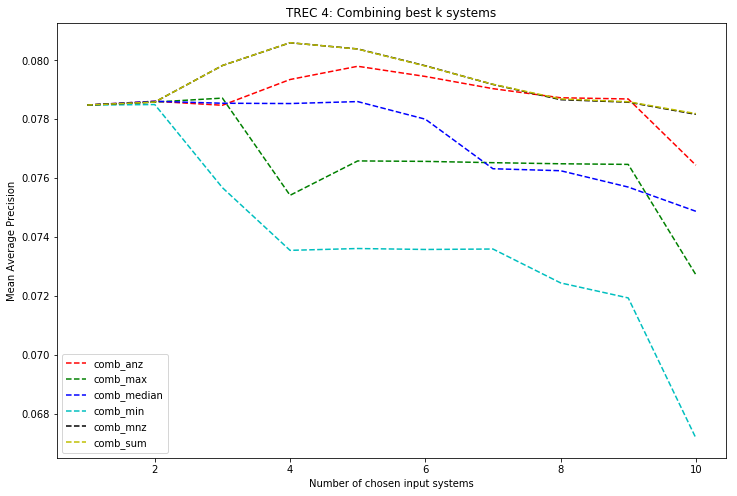

In [5]:
combList = "comb_anz.txt", "comb_max.txt", "comb_median.txt", "comb_min.txt", "comb_mnz.txt", "comb_sum.txt"
plot_BestkSys(results, combList)

### We execute Condorcet,Condorcet Weighted, CondorcetML, CondorcetLog on a set of systems and we progressively increased the number of systems used: We select progressively best k systems

In [ ]:
path = "C:\\Users\\annar\\Desktop\\temp\\temp"     
dir_in = "input"   
dir_w = "weights"     
dir_w_ml = "weights_ml"
dir_w_log = "weights_log"
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed = 1156818)
results = {}

for i in range(1, len(filename_list) + 1, 1):
    if(i <= 6):
        repeat = 1
    else:
        repeat = 1
    results[i] = {"condorcet.txt":0,"condorcetWeighted.txt":0,"condorcetML.txt":0,"condorcetLog.txt":0}
    for j in range(0,repeat,1):
        perm = [ sorted_w[k][0] for k in range(0,i) ]
        print ("Ripetizione numero: " + str(j))
        
        condorcet_alg(perm, path, dir_norm, dir_comb)
        MAP = take_MAP(path, dir_comb, dir_w, "condorcet.txt", False)
        results[i]["condorcet.txt"] += MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w)
        MAP = take_MAP(path, dir_comb, dir_w, "condorcetWeighted.txt", False)
        results[i]["condorcetWeighted.txt"] += MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w_ml, "condorcetML.txt")
        MAP = take_MAP(path, dir_comb, dir_w, "condorcetML.txt", False)
        results[i]["condorcetML.txt"] += MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w_log, "condorcetLog.txt")
        MAP=take_MAP(path, dir_comb, dir_w, "condorcetLog.txt", False)
        results[i]["condorcetLog.txt"] += MAP        
    #calcolo media per i sistemi    
    results[i]["condorcet.txt"] = results[i]["condorcet.txt"] / repeat
    results[i]["condorcetWeighted.txt"] = results[i]["condorcetWeighted.txt"] / repeat
    results[i]["condorcetML.txt"] = results[i]["condorcetML.txt"] / repeat
    results[i]["condorcetLog.txt"] = results[i]["condorcetLog.txt"] / repeat

In [6]:
#results = {1: {'condorcet.txt': 0.0727573798246, 'condorcetML.txt': 0.0727573798246, 'condorcetWeighted.txt': 0.0727573798246, 'condorcetLog.txt': 0.0727573798246}, 2: {'condorcet.txt': 0.0753394923044, 'condorcetML.txt': 0.0785835329819, 'condorcetWeighted.txt': 0.0785835329819, 'condorcetLog.txt': 0.0785835329819}, 3: {'condorcet.txt': 0.0723408329127, 'condorcetML.txt': 0.0731095115466, 'condorcetWeighted.txt': 0.0721356565178, 'condorcetLog.txt': 0.0727219190478}, 4: {'condorcet.txt': 0.0761570066118, 'condorcetML.txt': 0.0754822708915, 'condorcetWeighted.txt': 0.0788933932924, 'condorcetLog.txt': 0.0754963168912}, 5: {'condorcet.txt': 0.0756321594461, 'condorcetML.txt': 0.075703711218, 'condorcetWeighted.txt': 0.0756237468151, 'condorcetLog.txt': 0.0757546171263}, 6: {'condorcet.txt': 0.0755060219795, 'condorcetML.txt': 0.0755224039074, 'condorcetWeighted.txt': 0.0758317726403, 'condorcetLog.txt': 0.0755207784752}, 7: {'condorcet.txt': 0.0770318759709, 'condorcetML.txt': 0.074166609197, 'condorcetWeighted.txt': 0.0770584665966, 'condorcetLog.txt': 0.0769026964593}, 8: {'condorcet.txt': 0.0777571421612, 'condorcetML.txt': 0.077033907589, 'condorcetWeighted.txt': 0.0790824639283, 'condorcetLog.txt': 0.0773919821666}, 9: {'condorcet.txt': 0.0769281271792, 'condorcetML.txt': 0.0758380051365, 'condorcetWeighted.txt': 0.0769651848916, 'condorcetLog.txt': 0.075731963985}, 10: {'condorcet.txt': 0.0773039587209, 'condorcetML.txt': 0.0758265957829, 'condorcetWeighted.txt': 0.0777488754755, 'condorcetLog.txt': 0.0769410327231}}

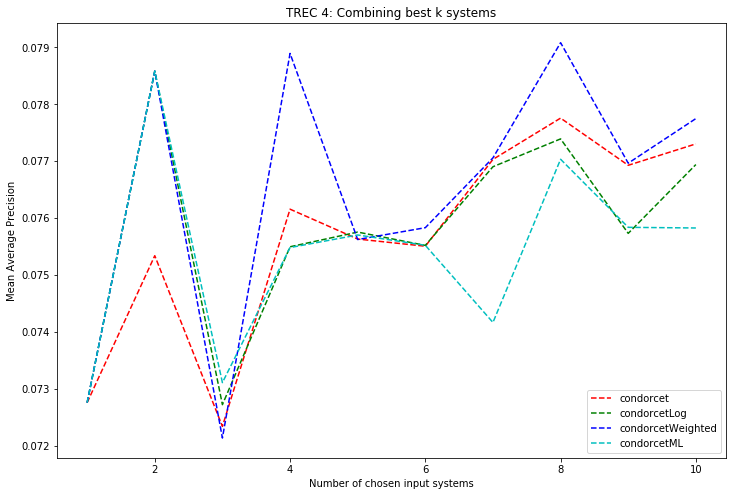

In [7]:
condList = "condorcet.txt", "condorcetLog.txt", "condorcetWeighted.txt", "condorcetML.txt"
plot_BestkSys(results, condList)

### We execute Condorcet,Condorcet Weighted, Comb MNZ and Comb Median on a set of systems and we progressively increased the number of system used: We select progressively best k system

In [ ]:
path = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\RankFusion"     
dir_in = "input"   
dir_w = "weights"       
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed = 1156818)
combList = "condorcet.txt","condorcetWeighted.txt",'comb_mnz.txt','comb_median.txt'
results = {}
        
for i in range(1, len(filename_list) + 1,1):    
    repeat = 1
        
    results[i] = {"condorcet.txt":0,"condorcetWeighted.txt":0,'comb_mnz.txt':0,'comb_median.txt':0}
    for j in range(0, repeat, 1):
        perm = [ sorted_w[k][0] for k in range(0, i) ]
        print "Ripetizione numero: "+str(j)

        condorcet_alg(perm, path, dir_norm, dir_comb)
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w)
        comb_mnz(perm, path, dir_norm, dir_comb)
        comb_median(perm, path, dir_norm, dir_comb)
        for filename in combList:
            MAP = take_MAP(path, dir_comb, dir_w, filename, False) 
            results[i][filename] += MAP
    #calcolo media per i sistemi   
    for filename in combList:
        results[i][filename] = results[i][filename] / repeat
    #results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat

In [8]:
#results = {1: {'condorcet.txt': 0.128206654867, 'comb_median.txt': 0.128207430659, 'condorcetWeighted.txt': 0.128206654867, 'comb_mnz.txt': 0.128207430659}, 2: {'condorcet.txt': 0.128340929355, 'comb_median.txt': 0.128280166914, 'condorcetWeighted.txt': 0.128248598812, 'comb_mnz.txt': 0.128336118465}, 3: {'condorcet.txt': 0.128479957228, 'comb_median.txt': 0.128829508552, 'condorcetWeighted.txt': 0.128476481321, 'comb_mnz.txt': 0.129426730566}, 4: {'condorcet.txt': 0.129212116812, 'comb_median.txt': 0.103469804739, 'condorcetWeighted.txt': 0.128834037258, 'comb_mnz.txt': 0.132492446814}, 5: {'condorcet.txt': 0.129185768251, 'comb_median.txt': 0.101996559023, 'condorcetWeighted.txt': 0.12919365355, 'comb_mnz.txt': 0.131353832276}, 6: {'condorcet.txt': 0.128289844195, 'comb_median.txt': 0.125128380659, 'condorcetWeighted.txt': 0.128958040171, 'comb_mnz.txt': 0.13084611126}, 7: {'condorcet.txt': 0.12827039519, 'comb_median.txt': 0.12730309437, 'condorcetWeighted.txt': 0.128245349529, 'comb_mnz.txt': 0.130232585103}, 8: {'condorcet.txt': 0.12798441324, 'comb_median.txt': 0.127586381862, 'condorcetWeighted.txt': 0.128454906951, 'comb_mnz.txt': 0.130525785992}, 9: {'condorcet.txt': 0.128783590204, 'comb_median.txt': 0.127887766841, 'condorcetWeighted.txt': 0.128809902931, 'comb_mnz.txt': 0.131523770508}, 10: {'condorcet.txt': 0.128117507998, 'comb_median.txt': 0.127276988456, 'condorcetWeighted.txt': 0.128607896895, 'comb_mnz.txt': 0.130550295986}}

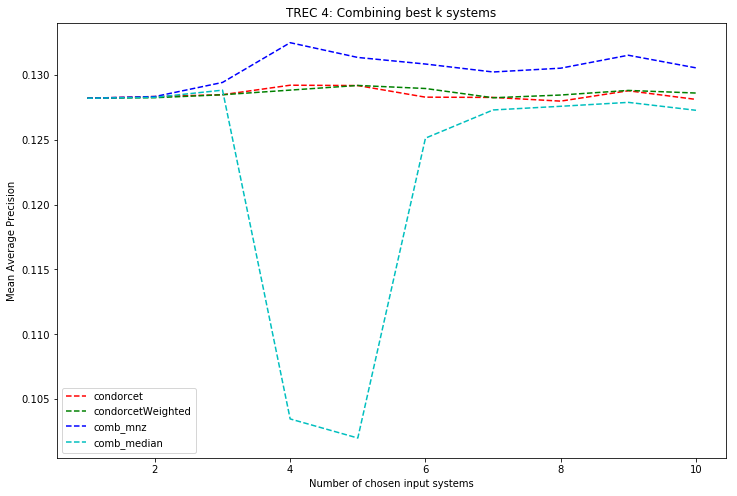

In [9]:
condcombList = "condorcet.txt", "condorcetWeighted.txt", "comb_mnz.txt", "comb_median.txt"
plot_BestkSys(results, condcombList)